In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [6]:
df = pd.read_csv('iris.data')

In [7]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [8]:
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [10]:
df.shape

(149, 5)

In [11]:
df.columns = ['sepal length', 'sepal width', 'petal length','petal width', 'species name']

In [12]:
df

,sepal length,sepal width,petal length,petal width,species name
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
features = ['sepal length', 'sepal width', 'petal length','petal width', 'species name']
target = ['species name']

In [14]:
X = df[features]
y = df[target]

In [15]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
df.groupby('species name').size()

species name
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [18]:
train, test = train_test_split(df, test_size = 0.4, stratify = df['species name'], random_state = 42)

In [19]:
print(train)

     sepal length  sepal width  petal length  petal width     species name
129           7.4          2.8           6.1          1.9   Iris-virginica
6             5.0          3.4           1.5          0.2      Iris-setosa
59            5.0          2.0           3.5          1.0  Iris-versicolor
94            5.7          3.0           4.2          1.2  Iris-versicolor
26            5.2          3.5           1.5          0.2      Iris-setosa
..            ...          ...           ...          ...              ...
37            4.4          3.0           1.3          0.2      Iris-setosa
71            6.3          2.5           4.9          1.5  Iris-versicolor
33            4.9          3.1           1.5          0.1      Iris-setosa
82            6.0          2.7           5.1          1.6  Iris-versicolor
3             5.0          3.6           1.4          0.2      Iris-setosa

[89 rows x 5 columns]


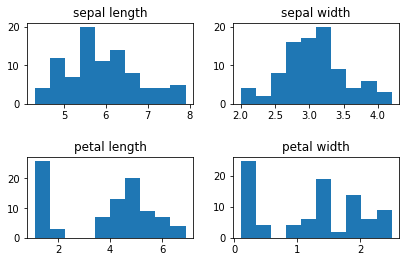

In [20]:
n_bins = 10

fig, axs = plt.subplots(2,2)

axs[0,0].hist(train['sepal length'], bins = n_bins);
axs[0,0].set_title('sepal length');

axs[0,1].hist(train['sepal width'], bins = n_bins);
axs[0,1].set_title('sepal width');

axs[1,0].hist(train['petal length'], bins = n_bins);
axs[1,0].set_title('petal length');

axs[1,1].hist(train['petal width'], bins = n_bins);
axs[1,1].set_title('petal width');

#add some space between subplots

fig.tight_layout(pad = 2.0);

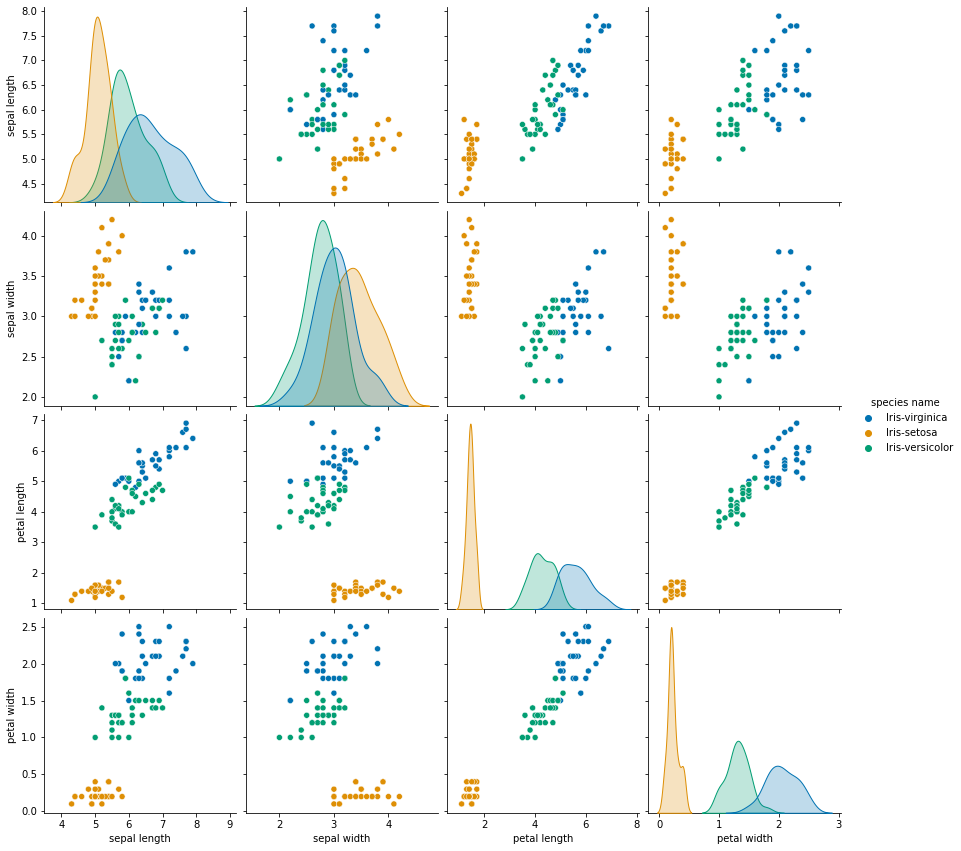

In [21]:

fn = ["sepal length", "sepal width", "petal length", "petal width"]
cn = ['setosa', 'versicolor', 'virginica']
sns.pairplot(train, hue="species name", height = 3, palette = 'colorblind');

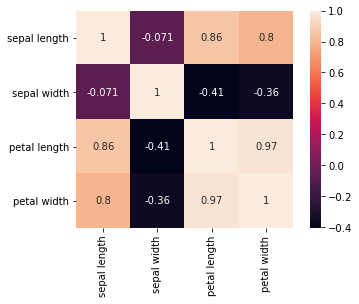

In [22]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

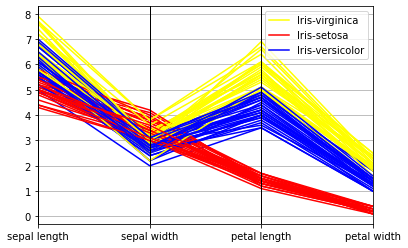

In [23]:
parallel_coordinates(train, "species name", color = ['yellow', 'red', 'blue']);

In [24]:
X_train = train[['sepal length','sepal width','petal length','petal width']]
y_train = train[['species name']]
X_test = test[['sepal length','sepal width','petal length','petal width']]
y_test = test[['species name']]

In [25]:
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 1)

In [26]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [27]:
pred=classifier.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(pred,y_test)))

The accuracy of the Decision Tree is 0.983


In [28]:
classifier.feature_importances_

array([0.        , 0.        , 0.42935729, 0.57064271])

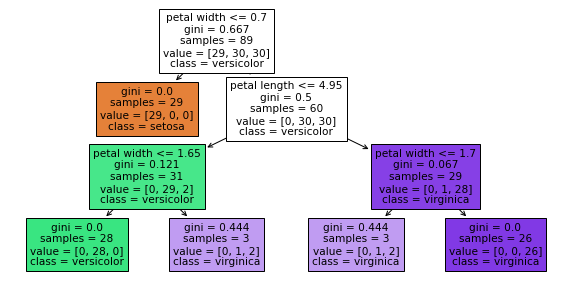

In [29]:
plt.figure(figsize = (10,5))
plot_tree(classifier, feature_names = fn, class_names = cn, filled = True);

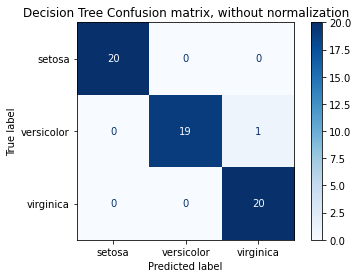

In [41]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');